# Predecir los sueldos de la NBA 
 
Trabajaremos en dos archivos. El primero contiene jugadores y las estadísticas correspondientes. El segundo proporciona información estacional sobre sus salarios de 1985 a 2018. Su objetivo es construir un modelo que prediga los salarios de la NBA. Siéntase libre de trabajar solo con un subconjunto de jugadores o atributos. Más detalles [aquí](https://www.kaggle.com/abdullahsahin/nba-salaries). 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

players = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/players.csv")
players

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,zizican01,"January 4, 1997","Split, Croatia",0.6,58.3,-,70.8,91,17.5,6.4,...,23rd overall,1st round,Boston Celtics,2016,6-11,NaN,Ante Zizic,Center,Right,254lb
4681,zoetji01,"December 20, 1953","Uxbridge, Canada",0.1,20.0,-,-,7,-0.8,0.3,...,NaN,NaN,NaN,NaN,7-1,"Port Perry in Port Perry, Canada",Jim Zoet,Center,Right,240lb
4682,zopfbi01,"June 7, 1948",NaN,1.4,36.3,NaN,55.6,53,9.6,2.2,...,33rd overall,2nd round,Milwaukee Bucks,1970,6-1,"Monaca in Monaca, Pennsylvania",Bill Zopf,Point Guard,Right,170lb
4683,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,...,32nd overall,2nd round,Los Angeles Lakers,2016,7-1,NaN,Ivica Zubac,Center,Right,240lb


In [3]:
salaries = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/salaries_1985to2018.csv")
salaries.describe()

,salary,season_end,season_start
count,1.416300e+04,14163.00000,14163.00000
mean,3.164870e+06,2003.66942,2002.66942
std,4.185046e+06,9.16469,9.16469
min,2.706000e+03,1985.00000,1984.00000
25%,6.300000e+05,1996.00000,1995.00000
50%,1.500000e+06,2004.00000,2003.00000
75%,3.884239e+06,2012.00000,2011.00000
max,3.468255e+07,2018.00000,2017.00000


In [4]:
promedios = salaries.groupby('player_id')['salary'].mean().reset_index()

In [5]:
players.describe()

,career_AST,career_G,career_PTS
count,4685.000000,4685.000000,4685.000000
mean,1.420064,274.284525,6.425208
std,1.356122,311.116918,4.738534
min,0.000000,1.000000,0.000000
25%,0.500000,33.000000,2.900000
50%,1.000000,133.000000,5.200000
75%,1.900000,456.000000,8.700000
max,11.200000,1611.000000,30.100000


In [14]:
df_merged = pd.read_csv('df_nba_sueldos.csv')

# Limpieza de dataset

In [ ]:
#Esto es lo que se hizo para armar el dataframe!!


#X = players.dropna()
#X['draft_year'] = X['draft_year'].astype(int)
#salaries['season_start'] = salaries['season_start'].astype(int)
#X = X.drop(columns=['birthDate','birthPlace','college','highSchool','name','draft_team','draft_round','draft_pick'])

#df_merged = pd.merge(promedios,X,left_on = 'player_id',right_on='_id',how = 'inner')
#df_merged = df_merged.drop(columns= ['_id'])
#df_merged['weight'] = df_merged['weight'].str.replace('lb','').astype(float)

#df_merged['career_AST'] = pd.to_numeric(df_merged['career_AST'], errors='coerce')
#df_merged['career_FG%'] = pd.to_numeric(df_merged['career_FG%'], errors='coerce')
#df_merged['career_PTS'] = pd.to_numeric(df_merged['career_PTS'], errors='coerce')
#df_merged['career_TRB'] = pd.to_numeric(df_merged['career_TRB'], errors='coerce')
#df_merged['career_WS'] = pd.to_numeric(df_merged['career_WS'], errors='coerce')
# Verificar si ahora todas las columnas son numéricas
#print(df_merged[['salary', 'career_AST', 'career_FG%', 'career_PTS', 'career_TRB', 'career_WS']].dtypes)

#df_merged.to_csv('df_nba_sueldos.csv')

salary        float64
career_AST    float64
career_FG%    float64
career_PTS    float64
career_TRB    float64
career_WS     float64
dtype: object


In [ ]:

scaler = StandardScaler()


df_merged['career_PTS'] = scaler.fit_transform(df_merged[['career_PTS']])
df_merged['career_TRB'] = scaler.fit_transform(df_merged[['career_TRB']])
df_merged['career_WS'] = scaler.fit_transform(df_merged[['career_WS']])

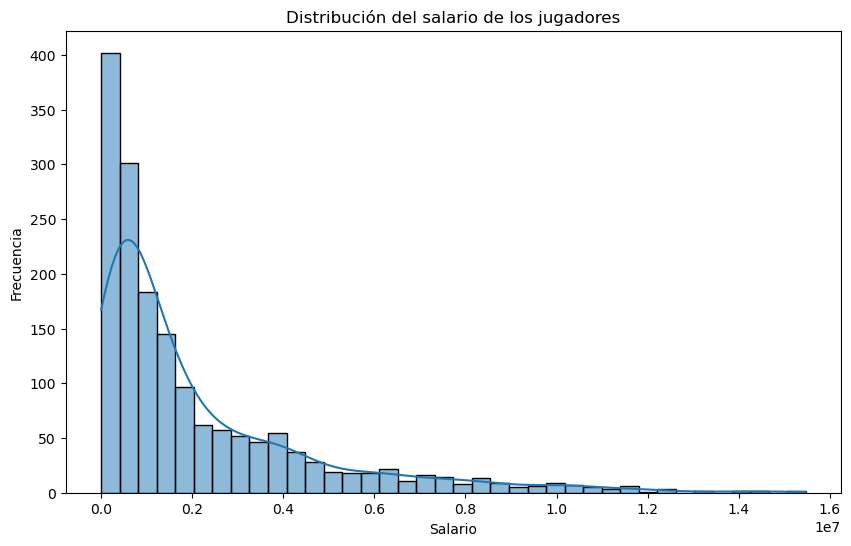

In [ ]:



plt.figure(figsize=(10, 6))
sns.histplot(df_merged['salary'], kde=True)
plt.title('Distribución del salario de los jugadores')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()


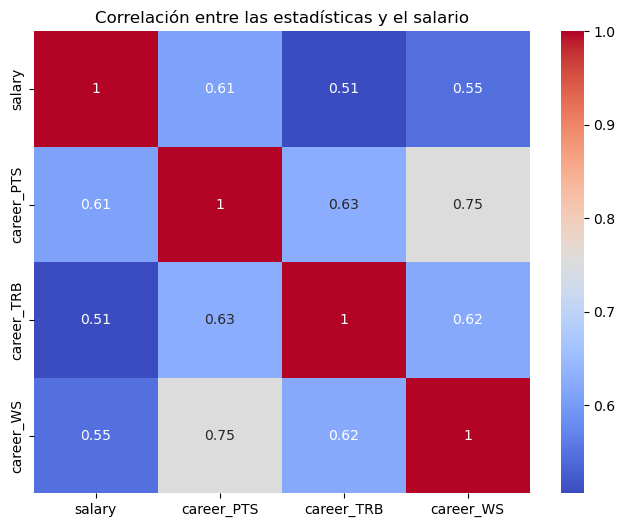

In [9]:
correlation_matrix = df_merged[['salary','career_PTS', 'career_TRB', 'career_WS']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las estadísticas y el salario')
plt.show()


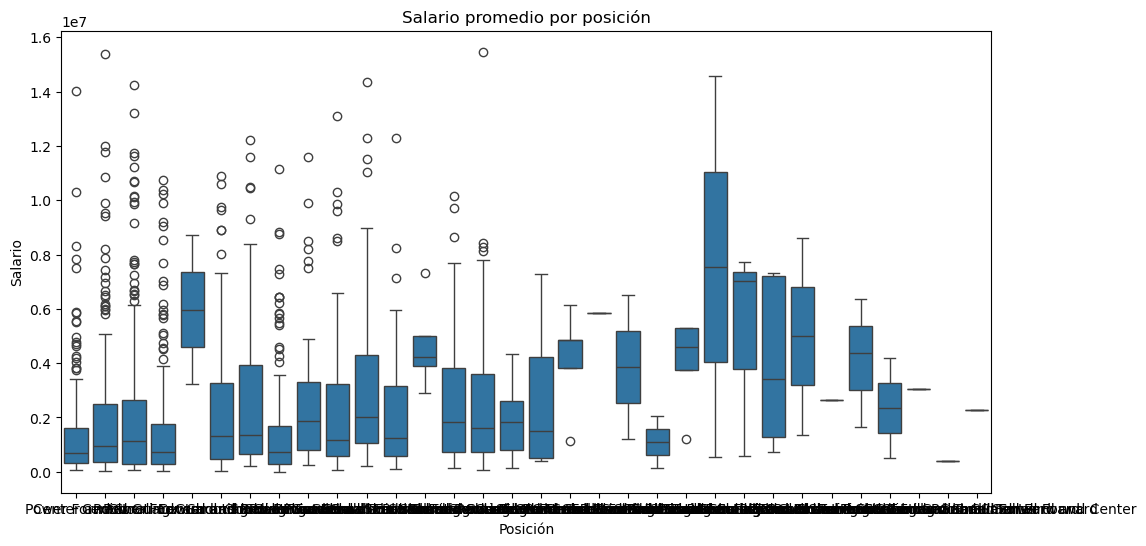

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='salary', data=df_merged)
plt.title('Salario promedio por posición')
plt.xlabel('Posición')
plt.ylabel('Salario')
plt.show()

In [31]:
df_merged.describe()

,Unnamed: 0,salary,career_AST,career_FG%,career_G,career_PTS,career_TRB,career_WS,draft_year,height,weight
count,1666.00000,1.666000e+03,1666.000000,1664.000000,1666.000000,1.666000e+03,1.666000e+03,1.666000e+03,1666.000000,1666.000000,1666.000000
mean,832.50000,2.110555e+06,1.749880,44.375541,432.863145,-2.441691e-16,-5.544451e-17,-4.051714e-17,1996.870348,6.578231,216.312125
std,481.07709,2.540352e+06,1.609765,6.665109,344.875810,1.000300e+00,1.000300e+00,1.000300e+00,11.835052,0.292434,26.595939
min,0.00000,2.706000e+03,0.000000,0.000000,1.000000,-1.548361e+00,-1.548449e+00,-8.050711e-01,1969.000000,5.250000,133.000000
25%,416.25000,4.272472e+05,0.600000,41.200000,126.000000,-7.793644e-01,-7.228078e-01,-6.863049e-01,1987.000000,6.416667,195.000000
50%,832.50000,1.101367e+06,1.200000,44.500000,369.500000,-2.075465e-01,-2.182493e-01,-3.893894e-01,1996.500000,6.583333,215.000000
75%,1248.75000,2.857438e+06,2.300000,48.100000,691.000000,5.959563e-01,5.156541e-01,3.177382e-01,2007.000000,6.833333,235.000000
max,1665.00000,1.546676e+07,11.200000,100.000000,1611.000000,4.386715e+00,4.735599e+00,7.824230e+00,2017.000000,7.583333,325.000000


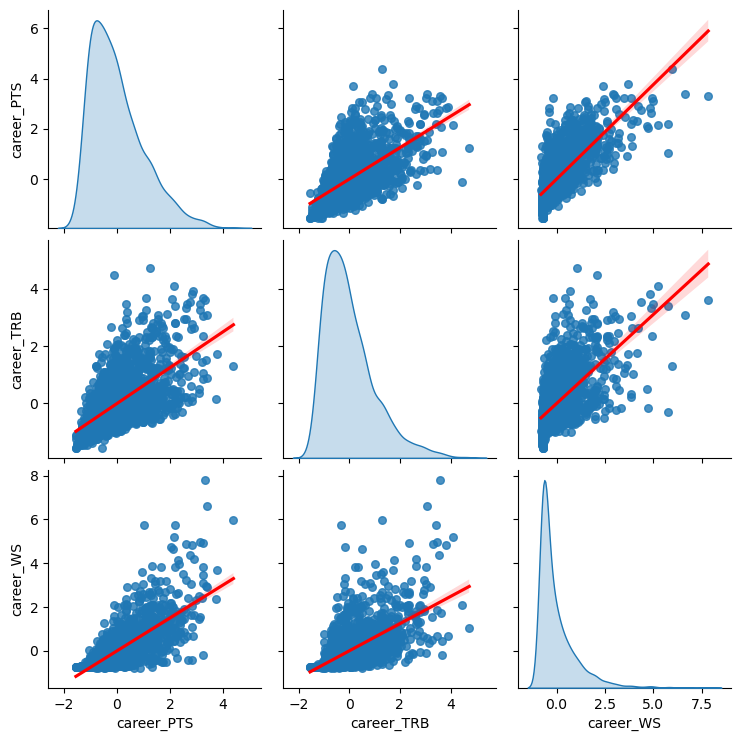

In [ ]:

sns.pairplot(df_merged[['career_PTS', 'career_TRB','career_WS']], kind='reg', 
             plot_kws={'ci': 95, 'line_kws': {'color': 'red'}, 'scatter_kws': {'s': 30}},
             diag_kind='kde')

In [11]:
# Crear una función para convertir 'pies-pulgadas' a pies decimales
def convertir_a_pies_decimal(altura_str):
    pies, pulgadas = map(int, altura_str.split('-'))
    return pies + pulgadas / 12

# Aplicar la conversión a la columna 'height'
df_merged['height'] = df_merged['height'].apply(convertir_a_pies_decimal)

# Verifica que la conversión se haya realizado correctamente
print(df_merged[['height']].head())


     height
0  6.833333
1  7.166667
2  6.083333
3  6.500000
4  6.750000


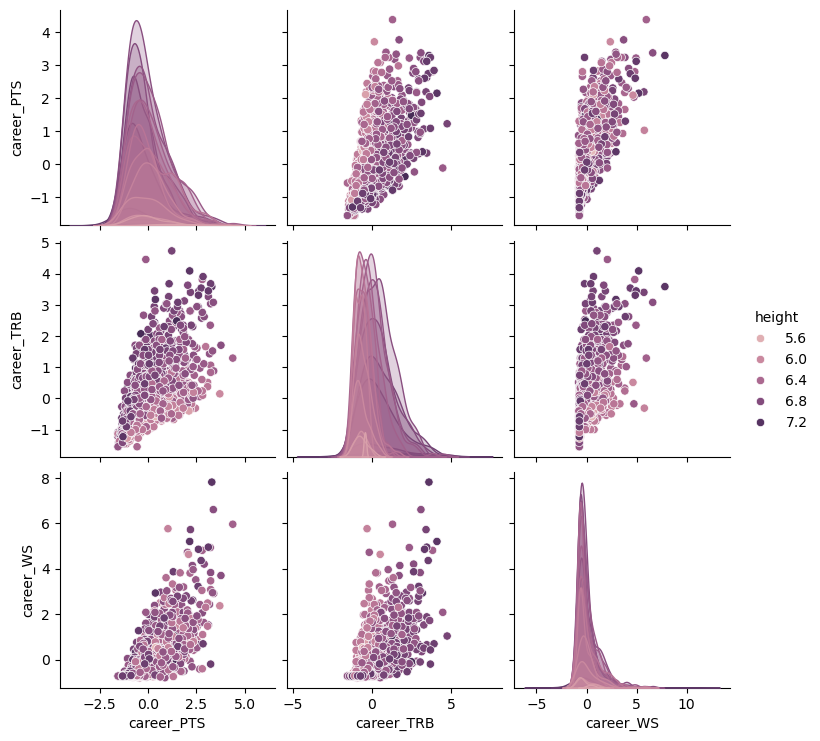

In [14]:
import seaborn as sns

# Crear el pairplot con un hue numérico para la altura de los jugadores
sns.pairplot(df_merged[['career_PTS', 'career_TRB','career_WS', 'height']], hue='height')


# Train

In [ ]:

#df_merged = df_merged.dropna()
X = df_merged[['career_PTS', 'career_TRB', 'career_WS']]
y = df_merged['salary']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.5, random_state=20)


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict (X_test)


mse = mean_squared_error(y_test,y_pred)
print ("MSE: ", mse)
r2_s = r2_score(y_test,y_pred)
print ("R2 Score: ",r2_s)

MSE:  4082689830955.7837
R2 Score:  0.37612425634035385


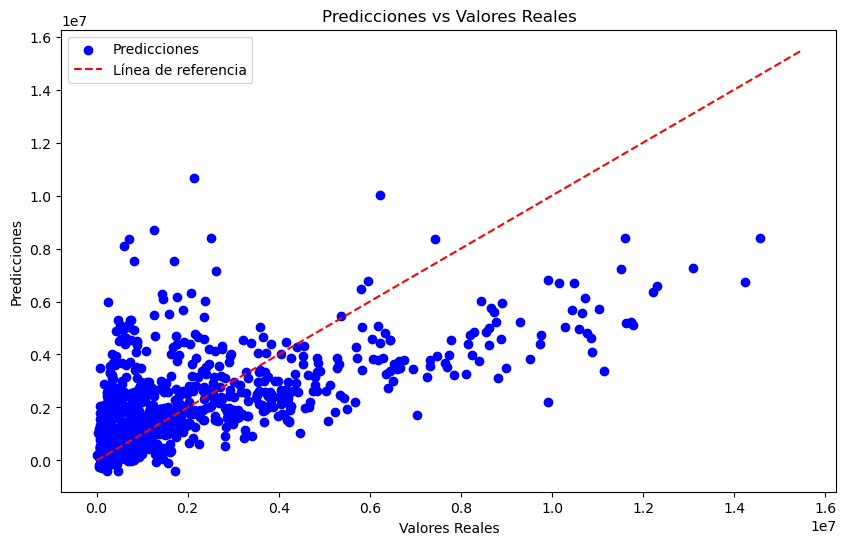

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones') 
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de referencia')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')  
plt.legend()
plt.show()




# Pruebas de training con opciones del gpt

In [13]:
df_merged

,Unnamed: 0.1,Unnamed: 0,player_id,salary,_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_year,height,position,shoots,weight
0,0,0,abdelal01,5.688000e+05,abdelal01,0.3,50.2,0.0,70.1,256,13.0,-0.424443,-0.034773,-0.570664,50.2,1990,6.833333,Power Forward,Right,240.0
1,1,1,abdulka01,2.140000e+06,abdulka01,3.6,55.9,5.6,72.1,1560,24.6,3.302233,3.588875,7.824230,55.9,1969,7.166667,Center,Right,225.0
2,2,2,abdulma02,2.205500e+06,abdulma02,3.5,44.2,35.4,90.5,586,15.4,1.330447,-0.676939,0.066923,47.2,1990,6.083333,Point Guard,Right,162.0
3,3,3,abdulta01,3.798280e+06,abdulta01,1.1,41.7,23.7,70.3,236,11.4,-0.010368,-0.034773,-0.611295,42.2,1997,6.500000,Shooting Guard,Right,223.0
4,4,4,abdursh01,8.715091e+06,abdursh01,2.5,47.2,29.7,81.0,830,19.0,2.020572,1.891723,1.504619,47.9,1996,6.750000,Center and Small Forward and Power Forward,Right,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,1661,1661,youngti01,3.018750e+05,youngti01,0.2,33.3,-,77.8,25,11.7,-1.114568,-0.906284,-0.714434,33.3,1999,7.000000,Center,Right,220.0
1662,1662,1662,zelleco01,5.998877e+06,zelleco01,1.4,51.1,26.3,74.0,361,15.5,0.068504,1.111951,0.032543,51.3,2013,7.000000,Center,Right,240.0
1663,1663,1663,zellety01,2.871139e+06,zellety01,0.9,50.9,28.6,76.4,412,14.9,-0.168111,0.469785,-0.186237,51.1,2012,7.000000,Center,Right,253.0
1664,1664,1664,zidekge01,6.937333e+05,zidekge01,0.2,40.8,25.0,78.3,135,8.7,-0.877954,-0.585201,-0.695681,40.9,1995,7.000000,Center,Right,250.0


In [ ]:

#df_merged = df_merged.dropna()
X = df_merged[['career_PTS', 'career_TRB', 'career_WS']]
y = df_merged['salary']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.5, random_state=20)

#Pasaje a base logaritmica del target

y_train_log = np.log1p(y_train)
#y_test_log = np.log1p(y_test)

#Uso de Ridge, regresor lineal con L2
model = Ridge(alpha = 1)

model.fit(X_train, y_train_log)

y_pred_log = model.predict (X_test)

y_pred = np.expm1(y_pred_log)


mse = mean_squared_error(y_test,y_pred)
print ("MSE: ", mse)
r2_s = r2_score(y_test,y_pred)
print ("R2 Score: ",r2_s)

MSE:  9499035968959.008
R2 Score:  -0.451547478392857


In [ ]:

# Define tus pipelines
models = {
    'Linear'     : LinearRegression(),
    'Ridge'      : Ridge(alpha=1.0),
    'Lasso'      : Lasso(alpha=0.1),
    'ElasticNet' : ElasticNet(alpha=0.1, l1_ratio=0.5),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
}

scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(np.expm1(y_true), np.expm1(y_pred))), greater_is_better=False)

for name, reg in models.items():
    pipe = make_pipeline(StandardScaler(), reg)
    # Aquí asumimos y_log1p; usamos cv=5
    scores = cross_val_score(pipe, X_train, y_train_log, cv=5, scoring=scorer)
    print(f"{name:13s}  RMSE promedio: {(-scores).mean():.0f}")


Linear         RMSE promedio: 2799400
Ridge          RMSE promedio: 2798165
Lasso          RMSE promedio: 2373256
ElasticNet     RMSE promedio: 2506172
RandomForest   RMSE promedio: 2206672


# Prueba separando datasets

In [7]:
df_merged =pd.read_csv('df_nba_normalized.csv')
df_merged.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)

In [ ]:

# Si tu DataFrame se llama df_merged y la columna es 'position'
df_merged = pd.get_dummies(df_merged, columns=['position'])

In [69]:
df_merged

,player_id,salary,_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_year,height,position,shoots,weight
0,abdelal01,5.688000e+05,abdelal01,0.3,50.2,0.0,70.1,256,13.0,-0.424443,-0.034773,-0.570664,50.2,1990,6.833333,Power Forward,Right,240.0
1,abdulka01,2.140000e+06,abdulka01,3.6,55.9,5.6,72.1,1560,24.6,3.302233,3.588875,7.824230,55.9,1969,7.166667,Center,Right,225.0
2,abdulma02,2.205500e+06,abdulma02,3.5,44.2,35.4,90.5,586,15.4,1.330447,-0.676939,0.066923,47.2,1990,6.083333,Point Guard,Right,162.0
3,abdulta01,3.798280e+06,abdulta01,1.1,41.7,23.7,70.3,236,11.4,-0.010368,-0.034773,-0.611295,42.2,1997,6.500000,Shooting Guard,Right,223.0
4,abdursh01,8.715091e+06,abdursh01,2.5,47.2,29.7,81.0,830,19.0,2.020572,1.891723,1.504619,47.9,1996,6.750000,Center and Small Forward and Power Forward,Right,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,youngti01,3.018750e+05,youngti01,0.2,33.3,-,77.8,25,11.7,-1.114568,-0.906284,-0.714434,33.3,1999,7.000000,Center,Right,220.0
1662,zelleco01,5.998877e+06,zelleco01,1.4,51.1,26.3,74.0,361,15.5,0.068504,1.111951,0.032543,51.3,2013,7.000000,Center,Right,240.0
1663,zellety01,2.871139e+06,zellety01,0.9,50.9,28.6,76.4,412,14.9,-0.168111,0.469785,-0.186237,51.1,2012,7.000000,Center,Right,253.0
1664,zidekge01,6.937333e+05,zidekge01,0.2,40.8,25.0,78.3,135,8.7,-0.877954,-0.585201,-0.695681,40.9,1995,7.000000,Center,Right,250.0


MSE para salarios bajos:  52456478484.69438
MSE para salarios altos:  5511508590055.595


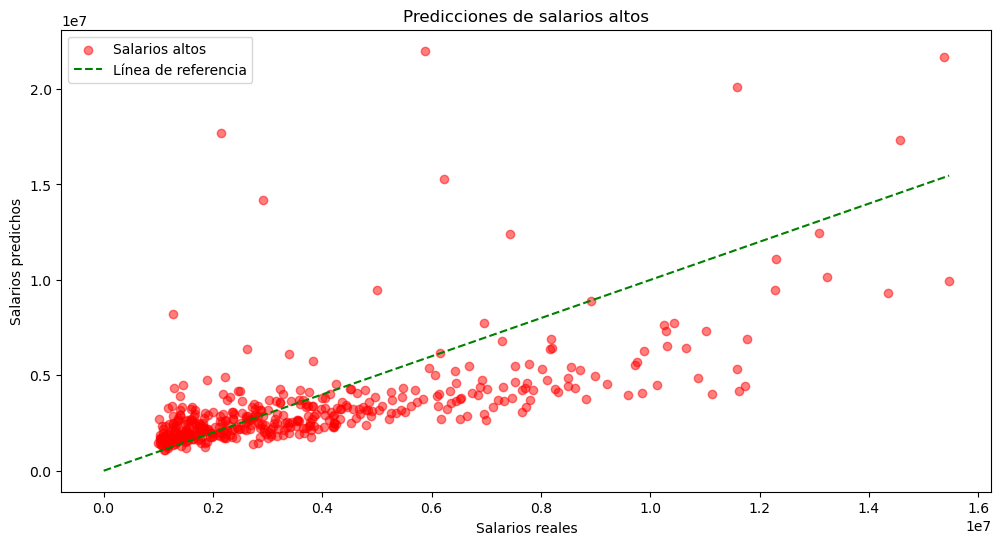

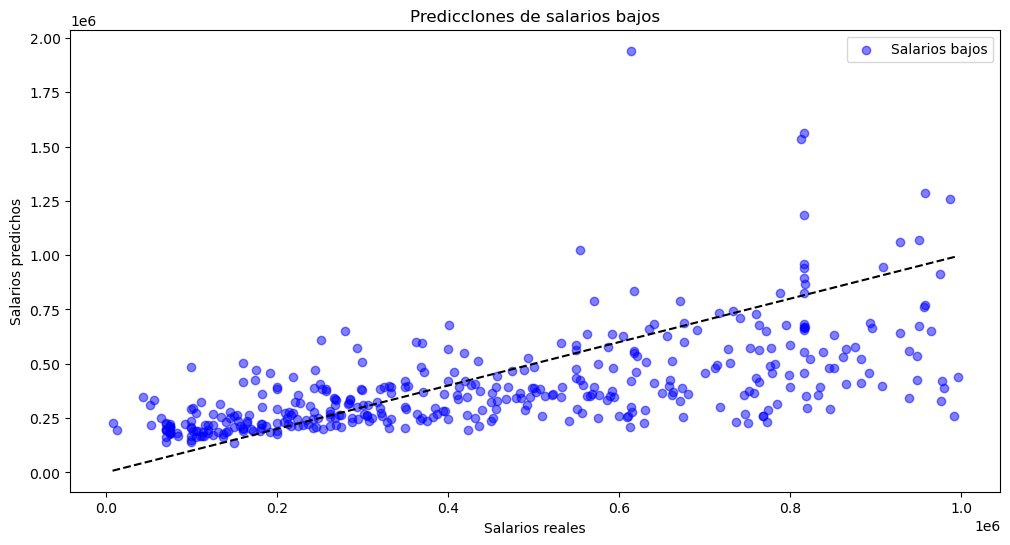

In [10]:
X_low_salary  = df_merged[df_merged['salary'] < 1000000].drop(columns=['salary','player_id','_id','position','shoots', 'career_AST', 'career_FG%', 'career_FG3%','career_FT%','career_G','career_PER','career_eFG%'])
X_high_salary = df_merged[df_merged['salary'] >= 1000000].drop(columns=['salary','player_id','_id','position','shoots', 'career_AST', 'career_FG%', 'career_FG3%','career_FT%','career_G','career_PER','career_eFG%'])
y_low_salary  = df_merged[df_merged['salary'] < 1000000]['salary'] 
y_high_salary = df_merged[df_merged['salary'] >= 1000000]['salary']

X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low_salary, y_low_salary, test_size=0.5, random_state=20)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high_salary, y_high_salary, test_size=0.5, random_state=20)   


model_low = Ridge(alpha=30)
model_low.fit(X_train_low, np.log1p(y_train_low))

y_pred_low_log = model_low.predict(X_test_low)
y_pred_low = np.expm1(y_pred_low_log)

model_high = Ridge(alpha=10)
model_high.fit(X_train_high, np.log1p(y_train_high))

y_pred_high_log = model_high.predict(X_test_high)
y_pred_high = np.expm1(y_pred_high_log)

mse_low = mean_squared_error(y_test_low, y_pred_low)
mse_high = mean_squared_error(y_test_high, y_pred_high)
print("MSE para salarios bajos: ", mse_low)
print("MSE para salarios altos: ", mse_high)

plt.figure(figsize=(12, 6))
plt.scatter(y_test_high, y_pred_high, color='red', label='Salarios altos', alpha=0.5)
plt.plot([0, y_test_high.max()], [0, y_test_high.max()], color='green', linestyle='--', label='Línea de referencia')
plt.title('Predicciones de salarios altos')
plt.xlabel('Salarios reales')
plt.ylabel('Salarios predichos')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test_low, y_pred_low, color='blue', label='Salarios bajos', alpha=0.5)
plt.plot([y_test_low.min(), y_test_low.max()], [y_test_low.min(), y_test_low.max()], color='black', linestyle='--')
plt.title('PrediccIones de salarios bajos')
plt.xlabel('Salarios reales')
plt.ylabel('Salarios predichos')
plt.legend()
plt.show()


# ALPHA 0.5 PARA LOS DOS
# Resultados de MSE para salarios bajos y altos UTILIZANDO LAS POSICIONES COMO VARIABLES DUMMIES
### MSE para salarios bajos:  62901744898.34486
### MSE para salarios altos:  5425627429561.465

# Resultados de MSE para salarios bajos y altos SIN POSICIONES
### MSE para salarios bajos:  57971612492.95101
### MSE para salarios altos:  5693890920449.801


# ALPHA 30 PARA BAJO Y 10 PARA ALTO, SIN POSICIONES .. MEJORES RESULTADOS?
### MSE para salarios bajos:  52456478484.69438
### MSE para salarios altos:  5511508590055.595

In [ ]:
#GridSearch para encontrar el mejor alpha para salarios bajos y altos
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10,15,20,25,30,35,40]}


grid_low = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_low.fit(X_train_low, np.log1p(y_train_low))
print("Mejor alpha para salarios bajos:", grid_low.best_params_)


grid_high = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_high.fit(X_train_high, np.log1p(y_train_high))
print("Mejor alpha para salarios altos:", grid_high.best_params_)

Mejor alpha para salarios bajos: {'alpha': 30}
Mejor alpha para salarios altos: {'alpha': 10}


# Unificando modelos

La idea es generar un modelo de clasificación el cuál determine si un jugador será de salario bajo o alto y desde ahí, predecir los salarios con los otros modelos obtenidos.

In [ ]:
# Ejemplo de uso:
# nuevo_jugador = [valor1, valor2, ...]  
# salario_estimado = predict_salary(nuevo_jugador)

# Clasificación de salarios bajos y altos
df_merged['salary_class'] = (df_merged['salary'] < 1_000_000).astype(int)
df_merged['salary_class'] = (df_merged['salary'] >= 1_000_000).astype(int)

features = [col for col in X_low_salary.columns]  

X_class = df_merged[features]
y_class = df_merged['salary_class']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_class, y_train_class)
y_pred_class = clf.predict(X_test_class)
print("Accuracy clasificación bajo/alto:", accuracy_score(y_test_class, y_pred_class))

# Para predecir salario de un nuevo jugador
def predict_salary(input_features):
    clase = clf.predict([input_features])[0]
    if clase == 0:
        pred_log = model_low.predict([input_features])[0]
        return np.expm1(pred_log)
    else:
        pred_log = model_high.predict([input_features])[0]
        return np.expm1(pred_log)



Accuracy clasificación bajo/alto: 0.788


In [22]:
new_player = X_test_class.iloc[0].values
print(predict_salary(new_player))

4155285.35176456


c:\Users\paez\anaconda3\envs\mlflow-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\paez\anaconda3\envs\mlflow-env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
